# Introduction

This lab demonstrates how to use hashing feature transformation using totally random trees to map data to a high-dimensional, sparse representation that may be useful for classification. The mapping is entirely unsupervised and very efficient.

# Import Libraries

In this step, we will import the necessary libraries for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

# Make Synthetic Dataset

In this step, we will create a synthetic dataset.

In [2]:
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# Use RandomTreesEmbedding to Transform Data

In this step, we will use RandomTreesEmbedding to transform data.

In [3]:
hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
X_transformed = hasher.fit_transform(X)

# Visualize Result After Dimensionality Reduction using Truncated SVD

In this step, we will visualize the result after dimensionality reduction using truncated SVD.

In [4]:
svd = TruncatedSVD(n_components=2, random_state=0)
X_reduced = svd.fit_transform(X_transformed)

# Learn a Naive Bayes Classifier on the Transformed Data

In this step, we will learn a Naive Bayes classifier on the transformed data.

In [5]:
nb = BernoulliNB()
nb.fit(X_transformed, y)

BernoulliNB()

# Learn an ExtraTreesClassifier for Comparison

In this step, we will learn an ExtraTreesClassifier for comparison.

In [6]:
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, y)

ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)

# Scatter Plot of Original and Reduced Data

In this step, we will create a scatter plot of original and reduced data.

[]

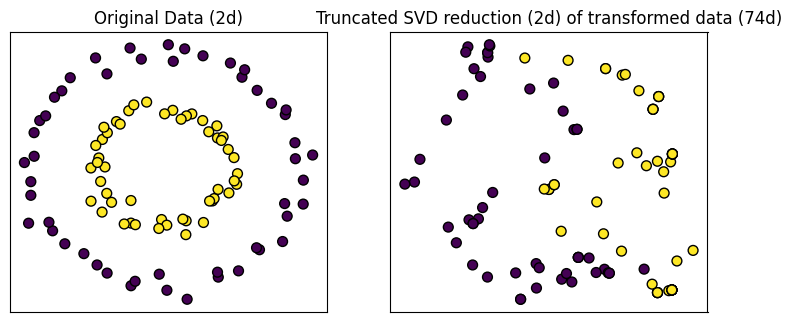

In [7]:
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor="k")
ax.set_title(
    "Truncated SVD reduction (2d) of transformed data (%dd)" % X_transformed.shape[1]
)
ax.set_xticks(())
ax.set_yticks(())

# Plot Decision in Original Space

In this step, we will plot the decision in original space.

[]

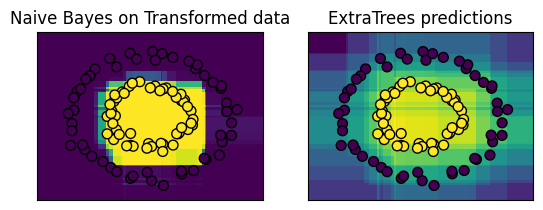

In [8]:
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# Summary

In this lab, we learned how to use hashing feature transformation using totally random trees to map data to a high-dimensional, sparse representation that may be useful for classification. We also learned how to visualize the partitions given by several trees and how the transformation can be used for non-linear dimensionality reduction or non-linear classification. We then demonstrated how to use Naive Bayes on the transformed data and compared it with an ExtraTreesClassifier learned on the original data.